## Pyber - Pablo

In [76]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
city = "data/city_data.csv"
ride = "data/ride_data.csv"
dfc = pd.read_csv(city)
dfr = pd.read_csv(ride)
df = pd.merge(dfc, dfr, how = 'outer', on='city')
df.to_csv('merged.csv')
df.dropna()
df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

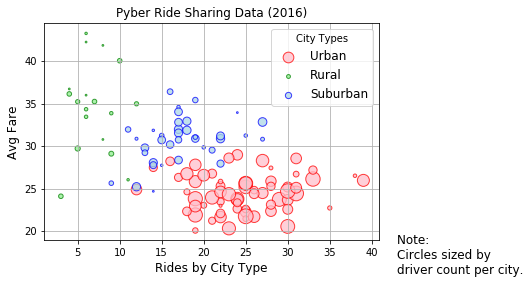

In [73]:
# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types
# Incorporate the other graph properties
# Create a legend
# Incorporate a text label regarding circle siz
# Save Figure

urban = df[df["type"] == "Urban"].groupby([df["city"]])
rural = df[df["type"] == "Rural"].groupby([df["city"]])
suburban = df[df["type"] == "Suburban"].groupby([df["city"]])
x_urban = urban["ride_id"].count()
y_urban = urban["fare"].mean()
s_urban = urban["driver_count"].mean()
x_rural = rural["ride_id"].count()
y_rural = rural["fare"].mean()
s_rural = rural["driver_count"].mean()
x_suburban = suburban["ride_id"].count()
y_suburban = suburban["fare"].mean()
s_suburban = suburban["driver_count"].mean()

plt.scatter(x_urban, y_urban, s_urban*3,
            label = "Urban", color=["pink"], edgecolor="red", alpha = 0.75, marker="o")
plt.scatter(x_rural, y_rural, s_rural*3,
            label = "Rural", color=["lightgreen"], edgecolor="green", alpha = 0.75, marker="o")
plt.scatter(x_suburban, y_suburban,s_suburban*3,
            label = "Suburban", color=["lightblue"], edgecolor="blue", alpha = 0.75, marker="o")
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Rides by City Type", fontsize =12)
plt.ylabel("Avg Fare", fontsize =12)
plt.title("Pyber Ride Sharing Data (2016)", fontsize =12)

legend = plt.legend(fontsize = 12, title= "City Types", loc="best") 
plt.text(43,15,"Note: \nCircles sized by \ndriver count per city.", fontsize = 12)

plt.savefig("pyber_bubble.png", bbox_inches="tight")
plt.show()

## Total Fares by City Type

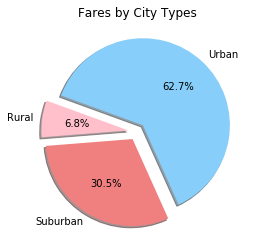

In [57]:
# Calculate Type Percents
# Build Pie Chart
# Save Figure
total = df.groupby(['type'])
fare_sum = total['fare'].sum()
labels = ["Rural","Suburban","Urban"]
explode = (0.1, 0.1, 0.1)
colors = ["pink", "lightcoral", "lightskyblue"]
plt.pie(fare_sum, explode = explode, labels = labels,
        colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 160)
plt.title("Fares by City Types")
plt.savefig("fares_pie.png")
plt.show()

## Total Rides by City Type

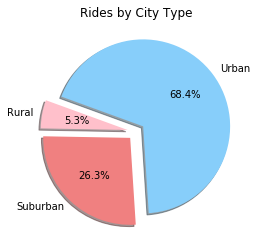

In [65]:
# Calculate Ride Percents
# Build Pie Chart
# Save Figure
rides_count = total['ride_id'].count()
labels = ["Rural","Suburban","Urban"]
explode = (0.1, 0.1, 0.1)
colors = ["pink", "lightcoral", "lightskyblue"]
plt.pie(rides_count, explode=explode, labels=labels,
        colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("Rides by City Type")
plt.savefig("rides_pie.png")
plt.show()

## Total Drivers by City Type

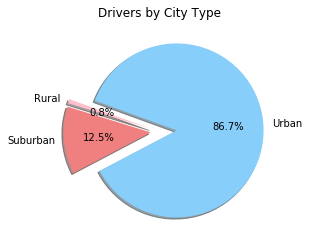

In [62]:
# Calculate Driver Percents
# Build Pie Charts
# Save Figure
# Calculate Type Percents
drivers = df.groupby(['type'])
drivers_sum = drivers['driver_count'].sum()
labels = ["Rural","Suburban","Urban"]
explode = (0.1, 0.1, 0.2)
colors = ["pink", "lightcoral", "lightskyblue"]
plt.pie(drivers_sum, explode=explode, labels=labels,
        colors=colors,autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("Drivers by City Type")
plt.savefig("drivers_pie.png")
plt.show()